<a href="https://colab.research.google.com/github/RayenBoukhchina/Energy-Consumption/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Energy_consumption.csv")
display(df.head())
print("shape", df.shape)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


shape (1000, 11)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [ ]:
min_value=min(df['Timestamp'])
max_value=max(df['Timestamp'])
print(min_value ,'to', max_value)

2022-01-01 00:00:00 to 2022-02-11 15:00:00


Text(0, 0.5, 'Load usage')

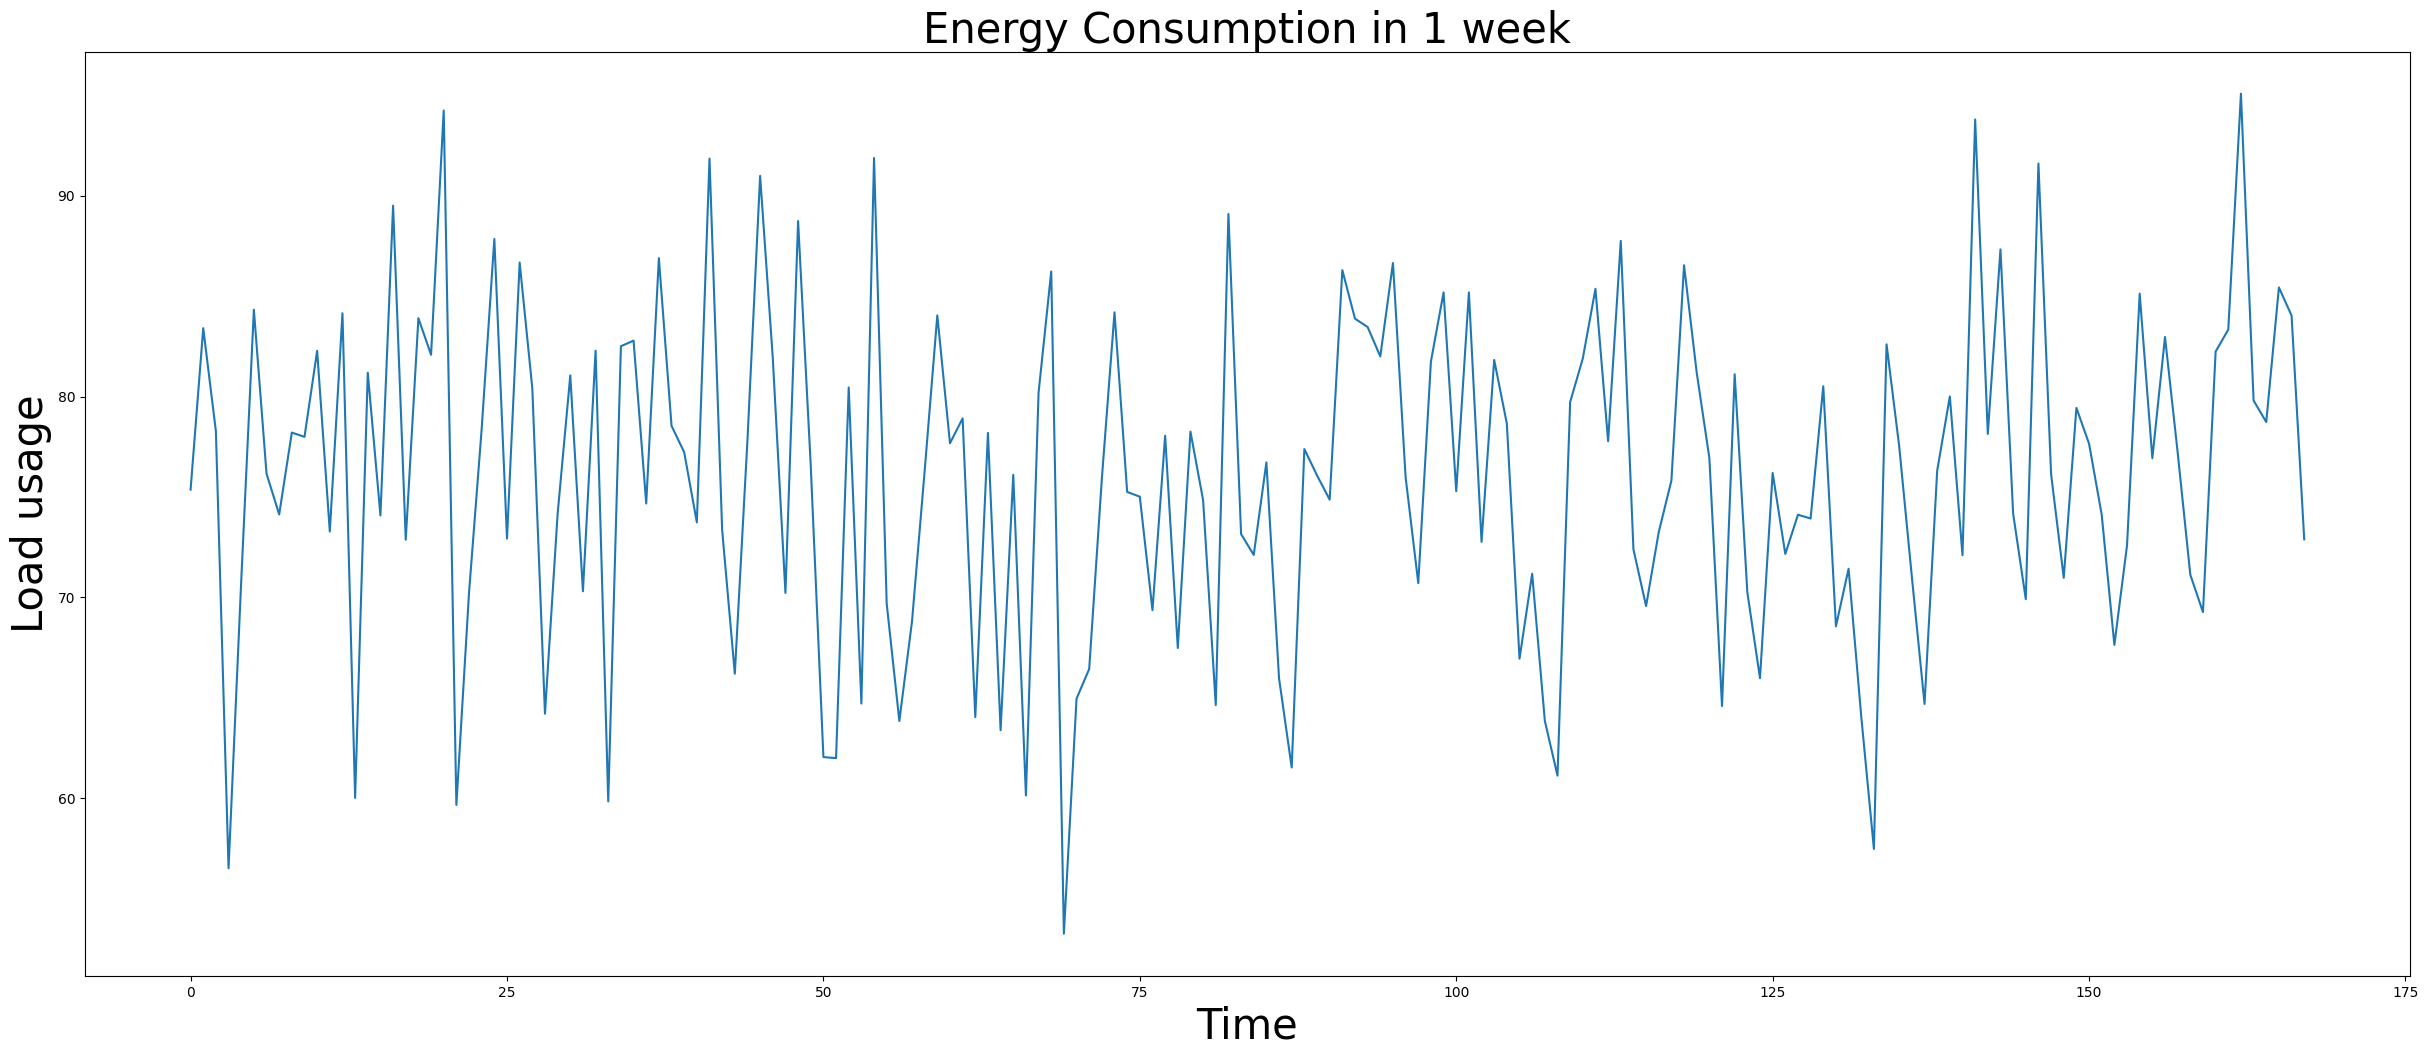

In [ ]:
fig, ax = plt.subplots(figsize=(30, 12))
ax.set_title("Energy Consumption in 1 week",fontsize=30)
ax.set_xlabel('Time', fontsize=30)
start=0
end=24*7
ax.plot(df['EnergyConsumption'][start:end])
ax.set_ylabel("Load usage", fontsize=30)

In [ ]:
continious_col=['Timestamp','Temperature','Humidity','SquareFootage' , 'RenewableEnergy']

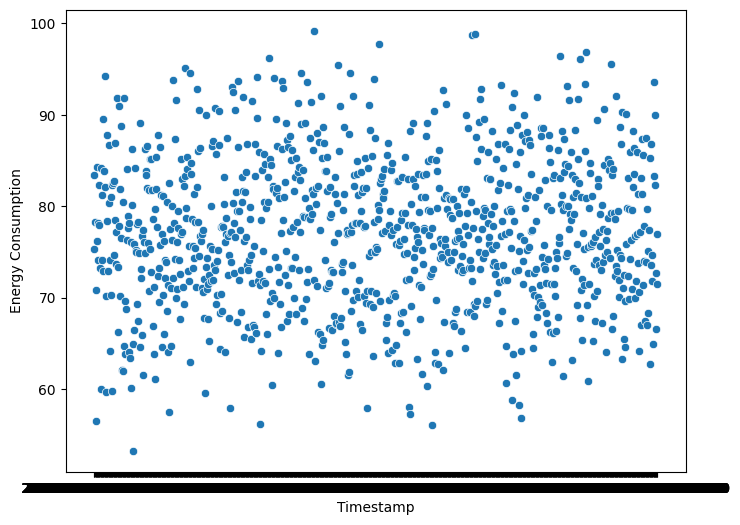

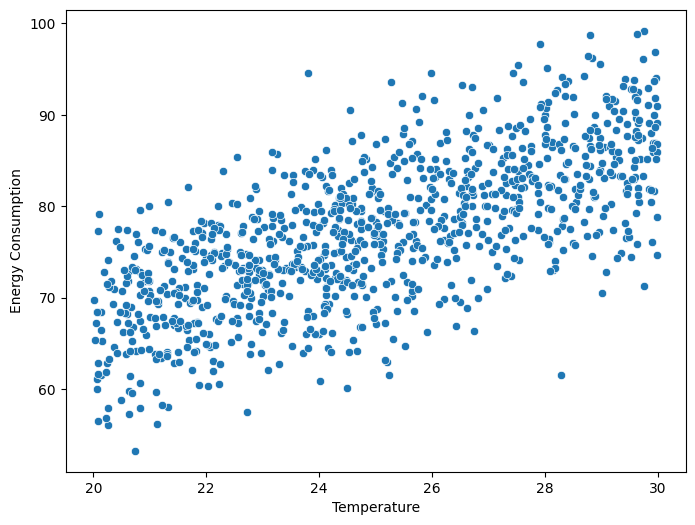

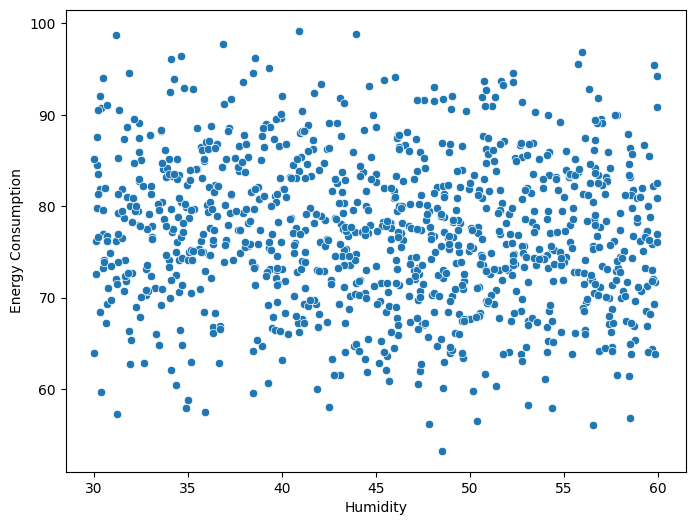

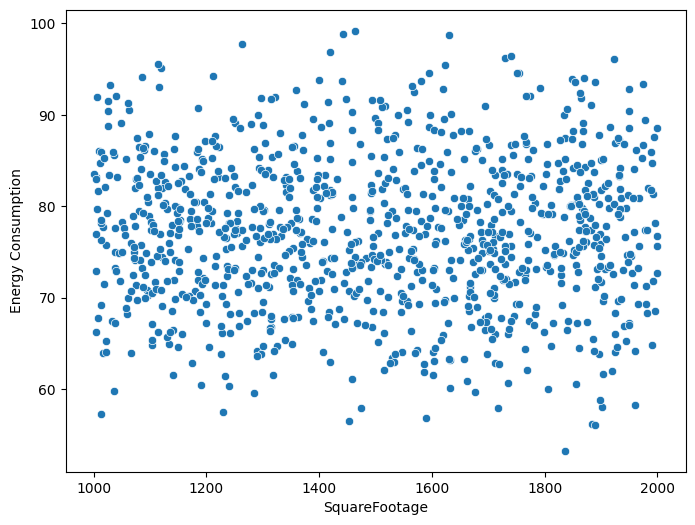

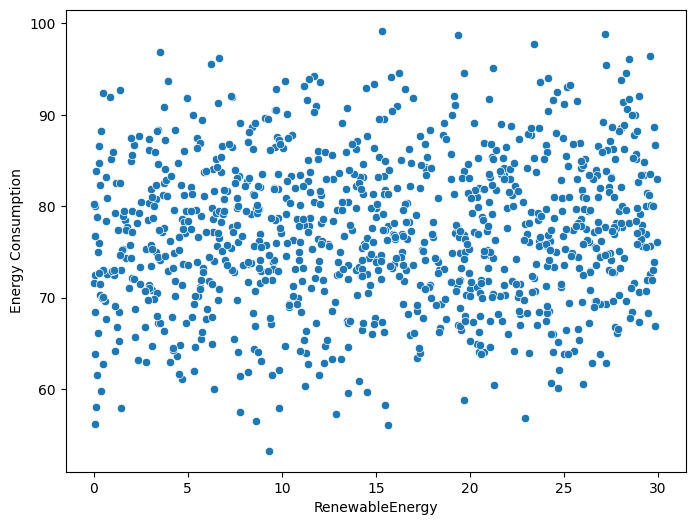

In [ ]:
def continious_feature_ploting(dataframe, col_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataframe[col_name],y='EnergyConsumption', data=df)
    plt.xlabel(col_name)
    plt.ylabel('Energy Consumption')
    plt.show(block=True)

for col_name in continious_col:
    continious_feature_ploting(df,col_name)


🧠 Colonnes catégorielles détectées : ['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']


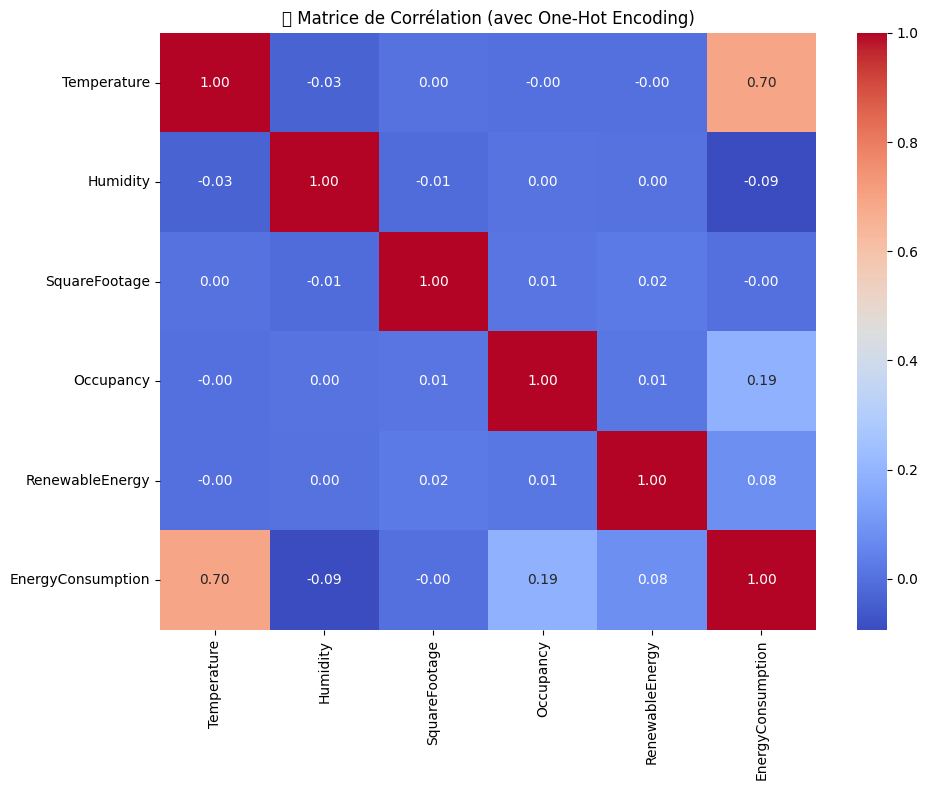

In [ ]:

# 3. Détection des colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\n🧠 Colonnes catégorielles détectées : {categorical_cols}")

# 4. Encodage one-hot des colonnes catégorielles
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Suppression des colonnes non numériques si nécessaire (à adapter)
# Exemple : colonnes de type ID ou datetime
for col in df_encoded.columns:
    if df_encoded[col].dtype not in ['float64', 'int64']:
        df_encoded.drop(col, axis=1, inplace=True)

# 6. Affichage de la heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔧 Matrice de Corrélation (avec One-Hot Encoding)")
plt.tight_layout()
plt.show()

In [ ]:
category_col= [col for col in df.columns if df[col].nunique() < 10]
category_col

['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']

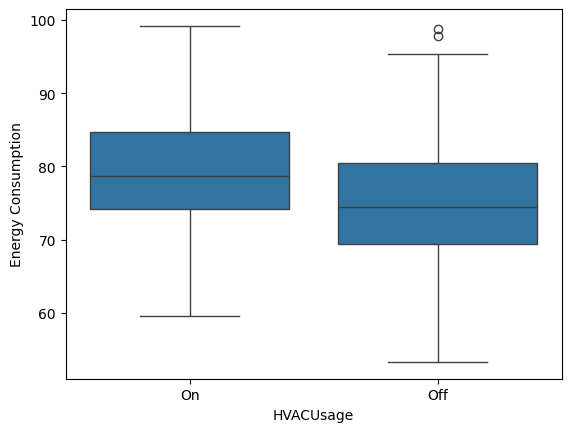

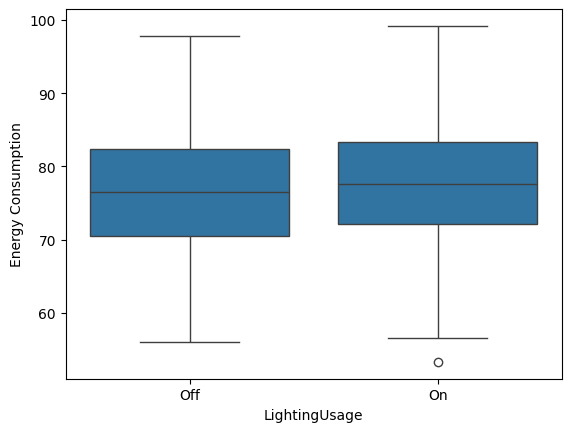

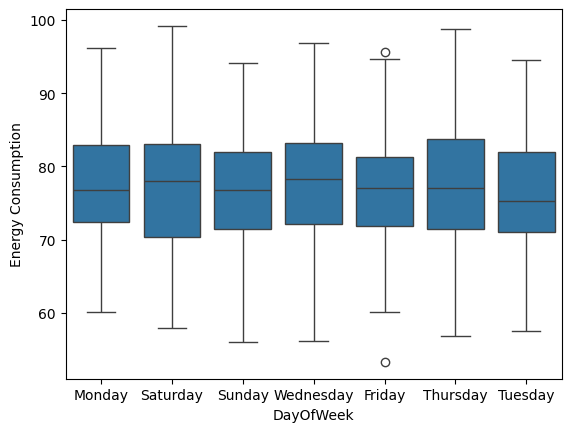

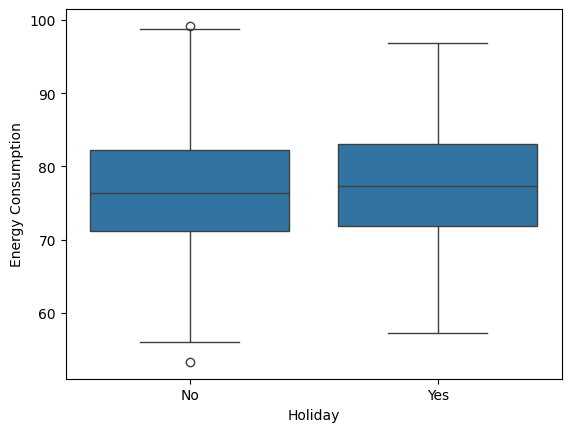

In [ ]:
def col_summary(dataframe, col_name):
    sns.boxplot(x=dataframe[col_name],y='EnergyConsumption', data=df)
    plt.xlabel(col_name)
    plt.ylabel('Energy Consumption')
    plt.show(block=True)

for col in category_col:
    col_summary(df,col)

In [ ]:
energy_dt=df
energy_dt['Timestamp'] = pd.to_datetime(energy_dt['Timestamp'])
print(energy_dt['Timestamp'])


0     2022-01-01 00:00:00
1     2022-01-01 01:00:00
2     2022-01-01 02:00:00
3     2022-01-01 03:00:00
4     2022-01-01 04:00:00
              ...        
995   2022-02-11 11:00:00
996   2022-02-11 12:00:00
997   2022-02-11 13:00:00
998   2022-02-11 14:00:00
999   2022-02-11 15:00:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]


In [ ]:
energy_dt['DayOfWeek'] = energy_dt['Timestamp'].dt.dayofweek
energy_dt['Hour'] = energy_dt['Timestamp'].dt.hour
energy_dt['Day'] = energy_dt['Timestamp'].dt.day
energy_dt['weekend']= energy_dt['DayOfWeek'].apply(lambda x: 1 if x == 6 else 0)
total_energy_consumption = energy_dt.groupby('weekend')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
Total_energy_per_holiday=energy_dt.groupby('Holiday')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
Total_energy_per_LightingUsage=energy_dt.groupby('LightingUsage')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
print("total Energy Consumption_using weekend feature",total_energy_consumption,'\n')

print("total Energy Consumption_using holiday feature",Total_energy_per_holiday,'\n')
print("total Energy Consumption_LightingUsage feature",Total_energy_per_LightingUsage,'\n')

total Energy Consumption_using weekend feature                   sum       mean     median       std
weekend                                              
0        65984.952283  77.085225  77.030949  8.206387
1        11070.920585  76.881393  76.018518  7.788872 

total Energy Consumption_using holiday feature                   sum       mean     median       std
Holiday                                              
No       40840.610625  76.624035  76.308881  8.107184
Yes      36215.262244  77.548741  77.375131  8.166840 

total Energy Consumption_LightingUsage feature                         sum       mean     median       std
LightingUsage                                              
Off            38841.265968  76.308970  76.555025  8.143900
On             38214.606901  77.830157  77.553946  8.079929 



In [ ]:
energy_dt = energy_dt.drop(columns=['Timestamp'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'day' column
energy_dt['HVACUsage'] = label_encoder.fit_transform(energy_dt['HVACUsage'])
energy_dt['LightingUsage'] = label_encoder.fit_transform(energy_dt['LightingUsage'])
energy_dt['Holiday'] = label_encoder.fit_transform(energy_dt['Holiday'])

In [ ]:
energy_dt.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,weekend
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,5,0,75.364373,0,1,0
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,5,0,83.401855,1,1,0
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,5,0,78.270888,2,1,0
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,5,0,56.519850,3,1,0
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,5,0,70.811732,4,1,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(energy_dt)


X = energy_dt.drop(columns=['EnergyConsumption'])
y = energy_dt['EnergyConsumption']

from sklearn.model_selection import train_test_split
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(mean_squared_error(y_test, y_pred))
print("Score:",model.score(x_test,y_test))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("r2_score: ",r2)
print("mean absolute error:",mae)

25.123835267828216
Score: 0.6215353287045497
r2_score:  0.6215353287045497
mean absolute error: 4.037558782305789


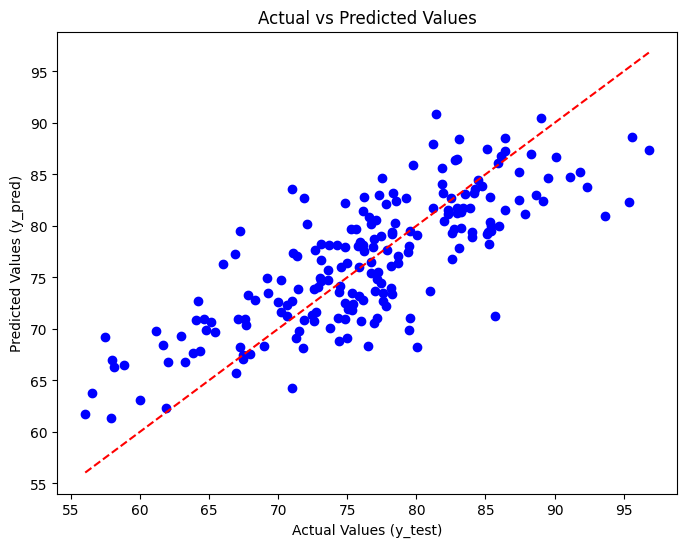

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')

# Add a line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()

In [ ]:
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})
print(df)

        y_test     y_pred
507  82.558204  76.801787
818  70.207281  74.769718
452  87.888631  81.113324
368  89.003574  90.490805
242  57.900483  61.297035
..         ...        ...
430  67.261207  68.253409
874  69.220374  74.893178
550  74.832869  72.489197
608  83.889177  81.691017
207  71.778721  68.109392

[200 rows x 2 columns]


In [ ]:
 xt=np.array([27.9, 45.89, 1560, 4, 1, 0, 22.9, 5,0,1,3,0]).reshape(1, -1)
 y_pred1 = model.predict(xt)
 print(y_pred1)

[84.93784712]
